In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, DataFrame
import seaborn as sns
from IPython.display import display
from pyspark.sql.functions import explode, col, isnan, count, when
%matplotlib inline

# Read Dataset

In [58]:
spark = SparkSession.builder.master("local[*]") \
        .appName('HW_3').getOrCreate()

In [59]:
path = 'E:\\Downloads\\diabetes_dataset\\diabetes_012_health_indicators_BRFSS2015.csv'

In [60]:
df = spark.read.csv(path, inferSchema=True, encoding='utf-8', header=True)
df.cache()
df.toPandas()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


# EDA

## Schema

In [61]:
df.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



## Descriptive Statistics

In [62]:
df.toPandas().describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Missing Values

In [63]:
df.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in df.columns]).toPandas()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_pd = df.toPandas()

## Target Column Distribution

In [65]:
df_pd['Diabetes_012'].value_counts().sort_index()

0    213703
1      4631
2     35346
Name: Diabetes_012, dtype: int64

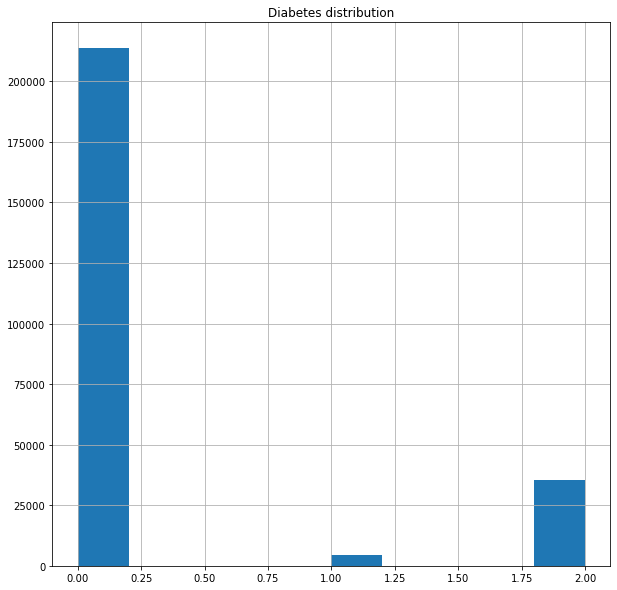

In [66]:
plt.figure(figsize=(10, 10))
df_pd['Diabetes_012'].hist()
plt.title('Diabetes distribution')
plt.show()

## High blood pressure distribution

In [67]:
df_grouped = df_pd.groupby('HighBP')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,HighBP,Diabetes_012
0,0,144851
1,1,108829


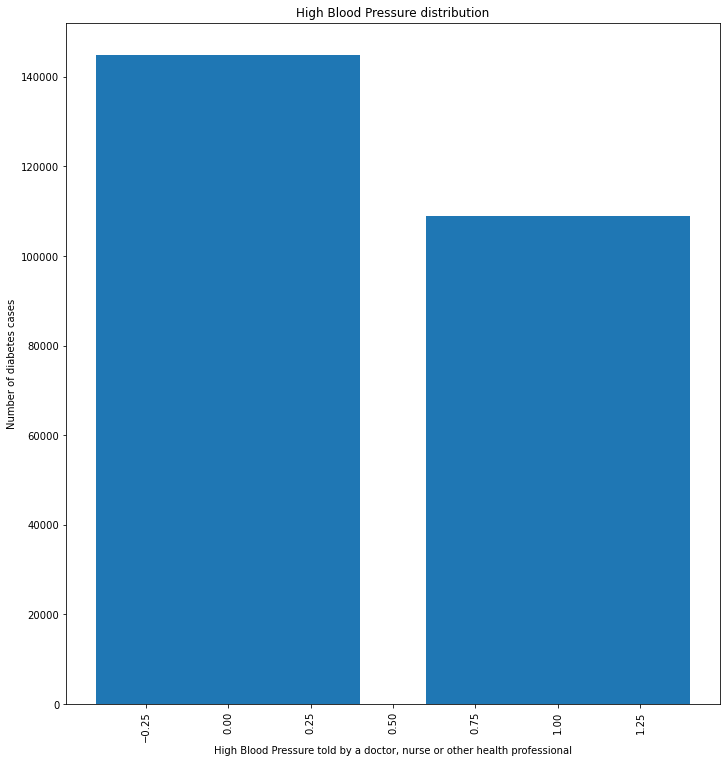

In [68]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['HighBP'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("High Blood Pressure distribution")
plt.xlabel("High Blood Pressure told by a doctor, nurse or other health professional")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## High Cholesterol distribution

In [69]:
df_grouped = df_pd.groupby('HighChol')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,HighChol,Diabetes_012
0,0,146089
1,1,107591


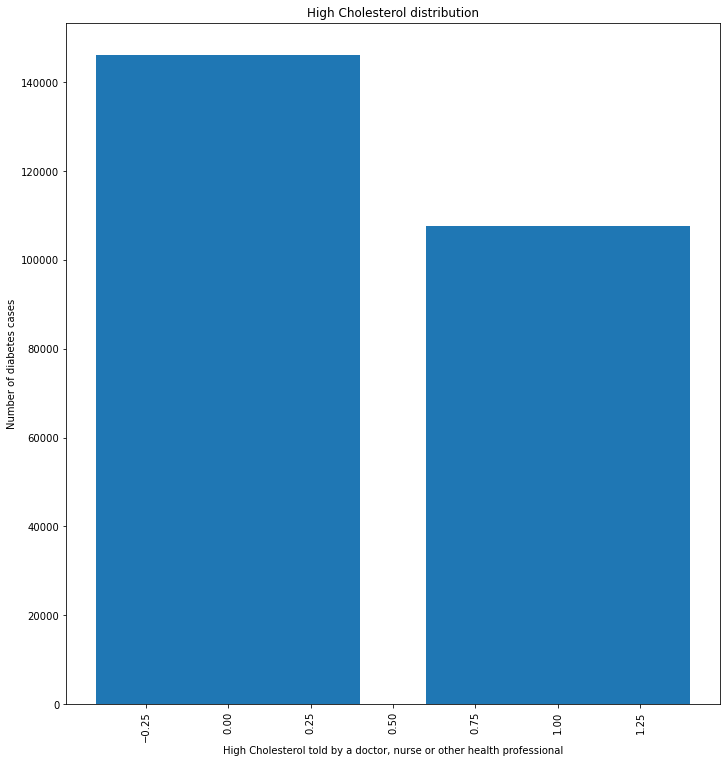

In [70]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['HighChol'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("High Cholesterol distribution")
plt.xlabel("High Cholesterol told by a doctor, nurse or other health professional")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Cholesterol Check distribution

In [71]:
df_grouped = df_pd.groupby('CholCheck')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,CholCheck,Diabetes_012
1,1,244210
0,0,9470


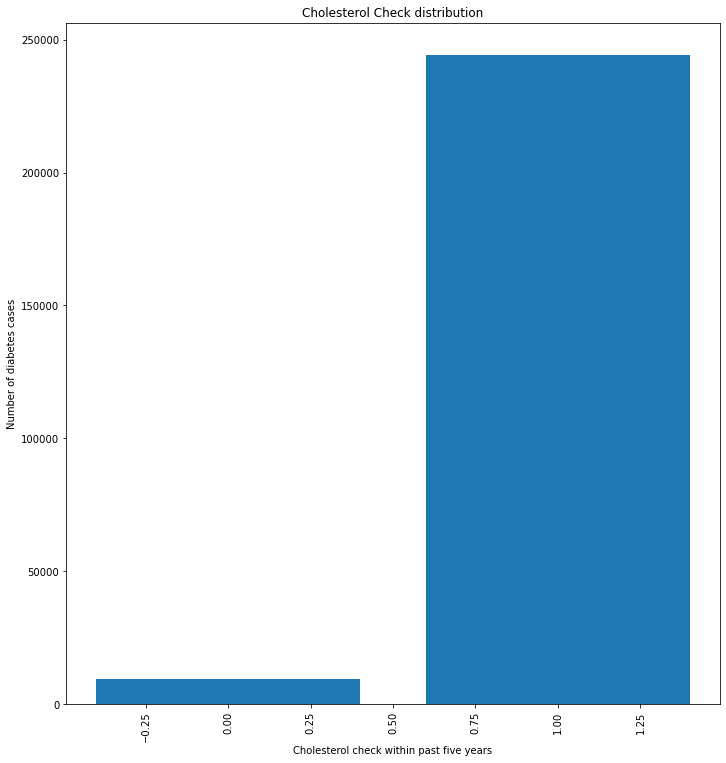

In [72]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['CholCheck'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Cholesterol Check distribution")
plt.xlabel("Cholesterol check within past five years")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Body Mass Index distribution

In [73]:
df_grouped = df_pd.groupby('BMI')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,BMI,Diabetes_012
15,27,24606
14,26,20562
12,24,19550
13,25,17146
16,28,16545
...,...,...
74,86,1
78,90,1
79,91,1
66,78,1


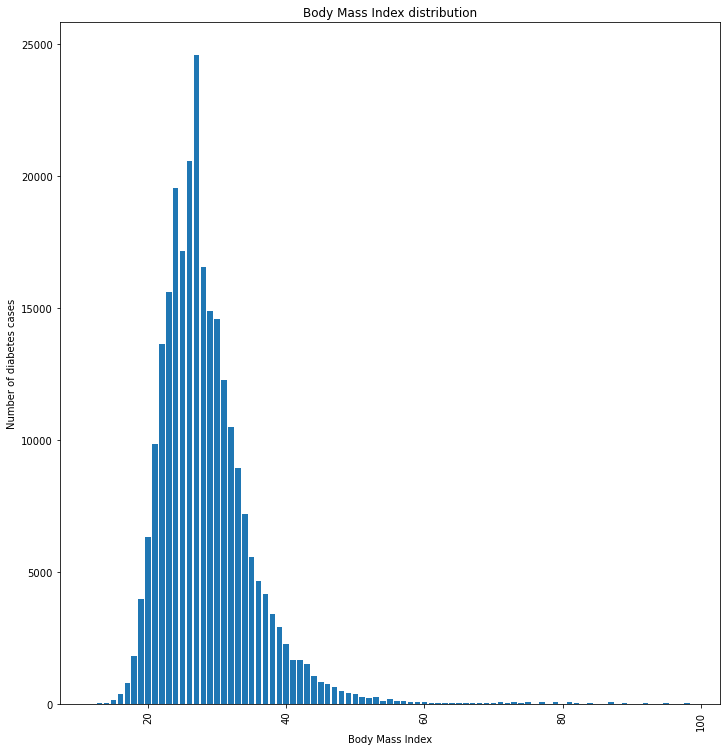

In [74]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['BMI'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Body Mass Index distribution")
plt.xlabel("Body Mass Index")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Smoker distribution

In [75]:
df_grouped = df_pd.groupby('Smoker')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Smoker,Diabetes_012
0,0,141257
1,1,112423


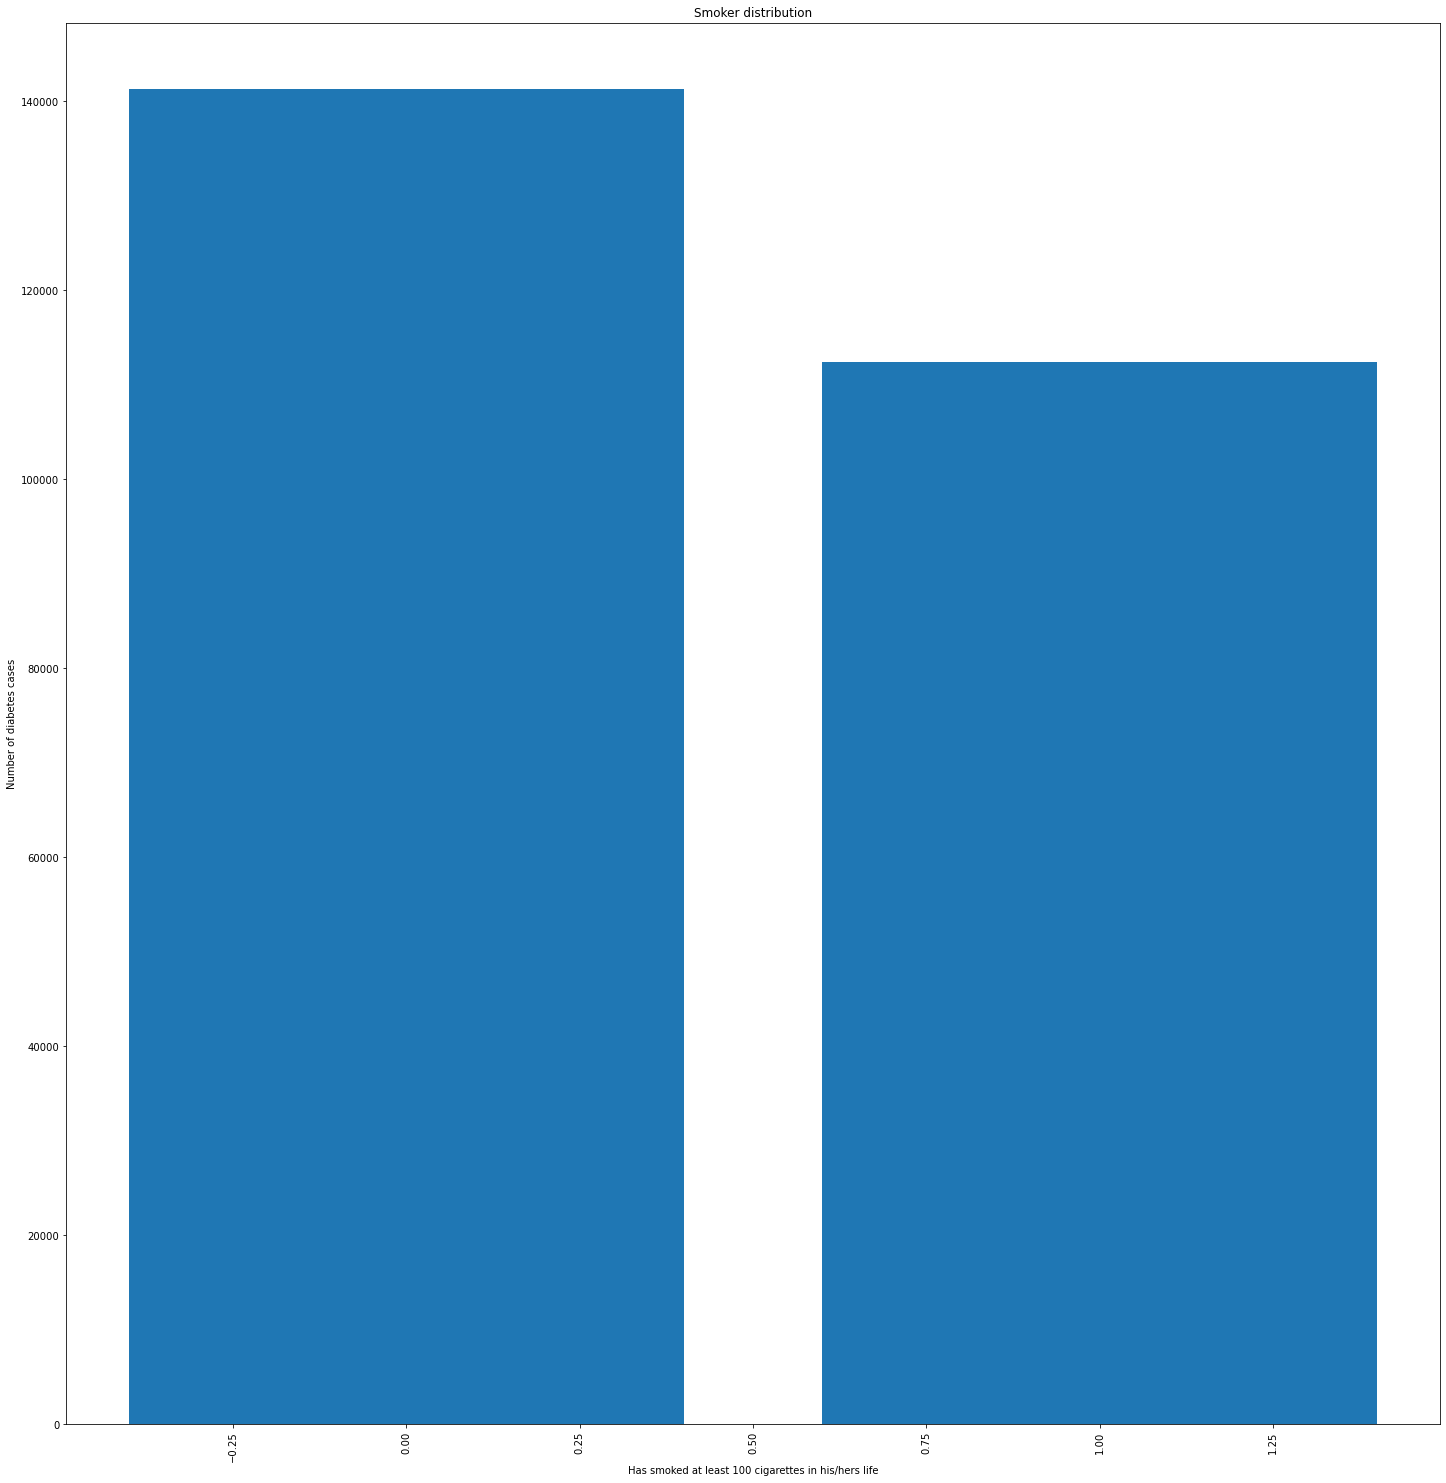

In [76]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Smoker'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Smoker distribution")
plt.xlabel("Has smoked at least 100 cigarettes in his/hers life")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Stroke distribution

In [77]:
df_grouped = df_pd.groupby('Stroke')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Stroke,Diabetes_012
0,0,243388
1,1,10292


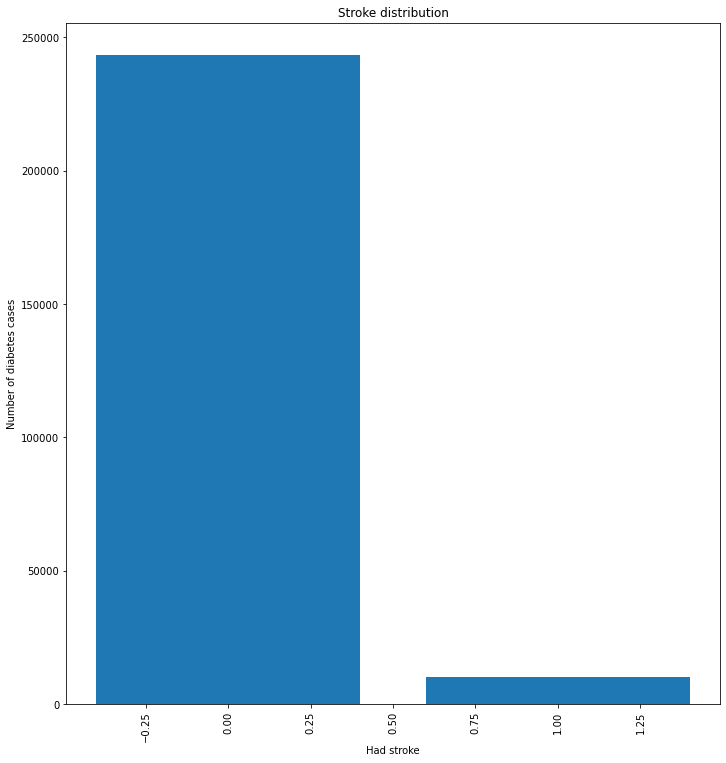

In [78]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Stroke'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Stroke distribution")
plt.xlabel("Had stroke")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Heart Disease or Attack

In [79]:
df_grouped = df_pd.groupby('HeartDiseaseorAttack')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,HeartDiseaseorAttack,Diabetes_012
0,0,229787
1,1,23893


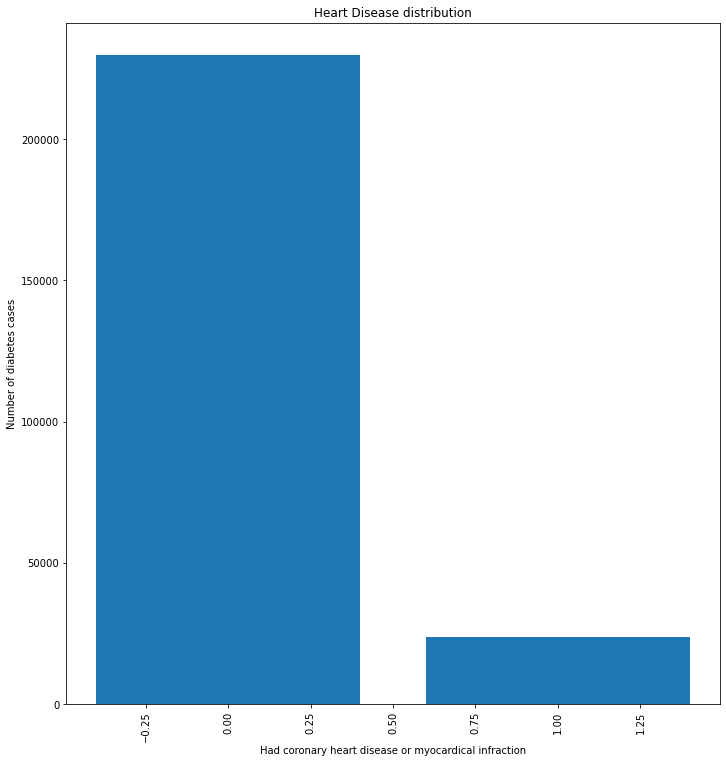

In [80]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['HeartDiseaseorAttack'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Heart Disease distribution")
plt.xlabel("Had coronary heart disease or myocardical infraction")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Physical Activity

In [81]:
df_grouped = df_pd.groupby('PhysActivity')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,PhysActivity,Diabetes_012
1,1,191920
0,0,61760


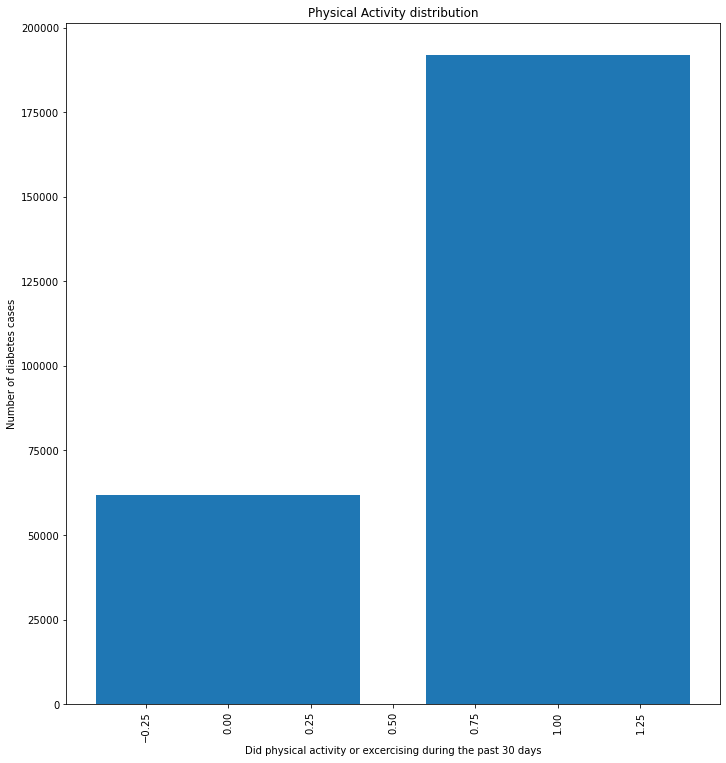

In [82]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['PhysActivity'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Physical Activity distribution")
plt.xlabel("Did physical activity or excercising during the past 30 days")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Fruits distribution

In [83]:
df_grouped = df_pd.groupby('Fruits')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Fruits,Diabetes_012
1,1,160898
0,0,92782


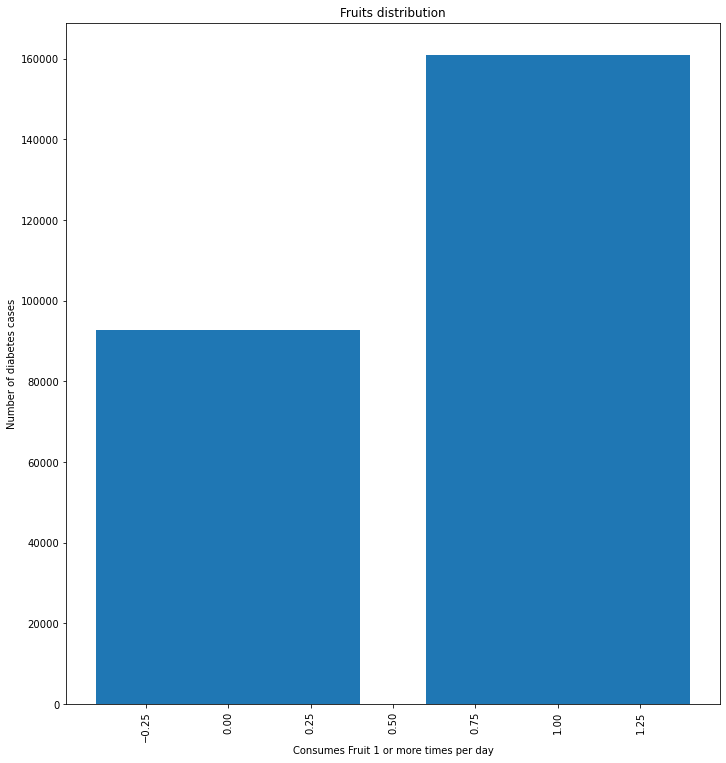

In [84]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Fruits'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Fruits distribution")
plt.xlabel("Consumes Fruit 1 or more times per day")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Veggies distribution

In [85]:
df_grouped = df_pd.groupby('Veggies')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Veggies,Diabetes_012
1,1,205841
0,0,47839


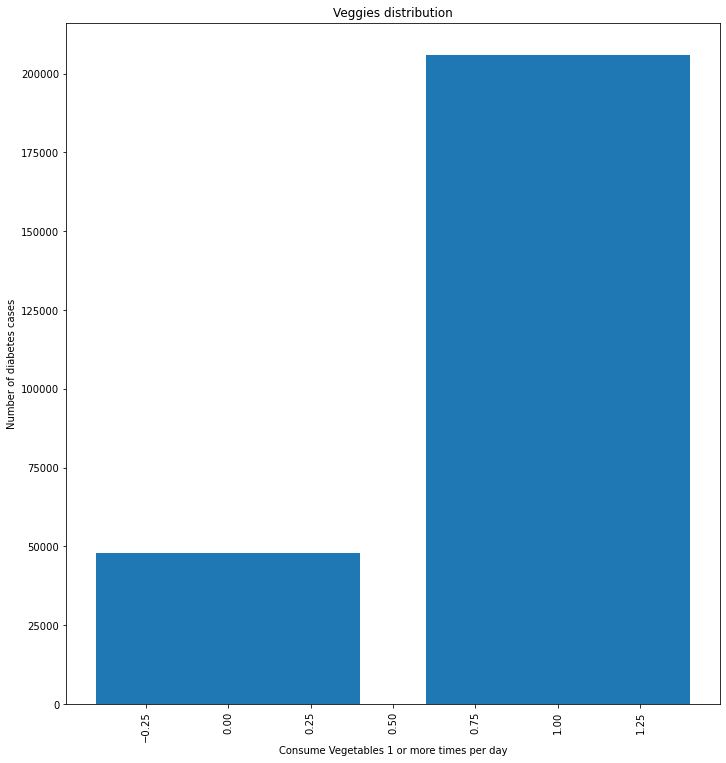

In [86]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Veggies'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Veggies distribution")
plt.xlabel("Consume Vegetables 1 or more times per day")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Heavy Alcohol Consumption distribution

In [87]:
df_grouped = df_pd.groupby('HvyAlcoholConsump')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,HvyAlcoholConsump,Diabetes_012
0,0,239424
1,1,14256


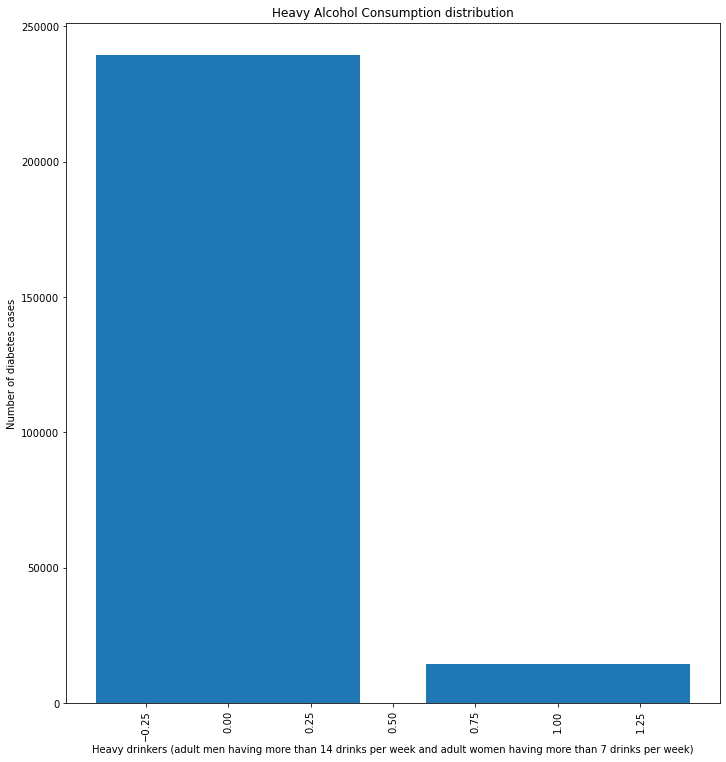

In [88]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['HvyAlcoholConsump'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Heavy Alcohol Consumption distribution")
plt.xlabel("Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Any Healthcare distribution

In [89]:
df_grouped = df_pd.groupby('AnyHealthcare')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,AnyHealthcare,Diabetes_012
1,1,241263
0,0,12417


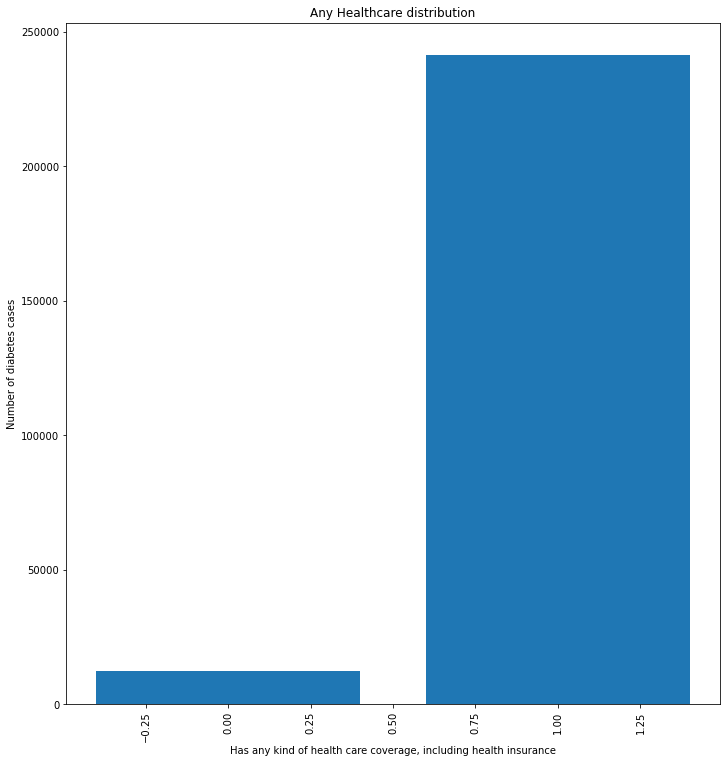

In [90]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['AnyHealthcare'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Any Healthcare distribution")
plt.xlabel("Has any kind of health care coverage, including health insurance")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## No Doctor because of cost distribution

In [91]:
df_grouped = df_pd.groupby('NoDocbcCost')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,NoDocbcCost,Diabetes_012
0,0,232326
1,1,21354


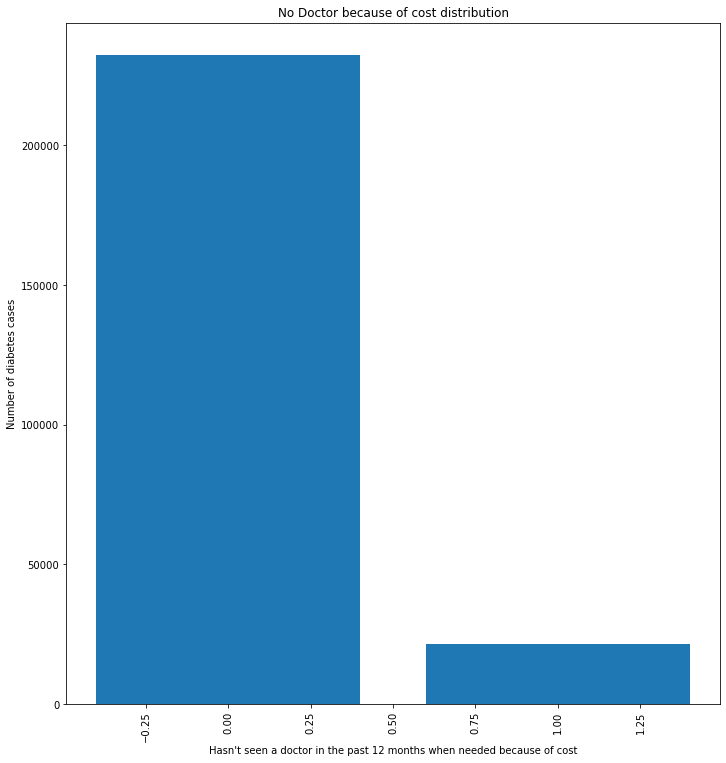

In [92]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['NoDocbcCost'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("No Doctor because of cost distribution")
plt.xlabel("Hasn't seen a doctor in the past 12 months when needed because of cost")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## General health distribution

In [93]:
df_grouped = df_pd.groupby('GenHlth')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,GenHlth,Diabetes_012
1,2,89084
2,3,75646
0,1,45299
3,4,31570
4,5,12081


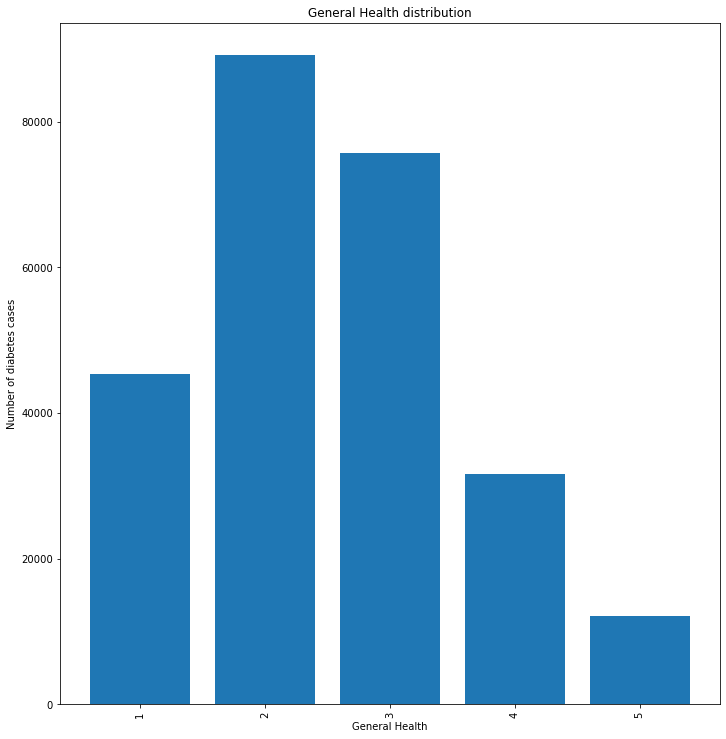

In [94]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['GenHlth'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("General Health distribution")
plt.xlabel("General Health")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Mental Health distribution

In [95]:
df_grouped = df_pd.groupby('MentHlth')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,MentHlth,Diabetes_012
0,0,175680
2,2,13054
30,30,12088
5,5,9030
1,1,8538
3,3,7381
10,10,6373
15,15,5505
4,4,3789
20,20,3364


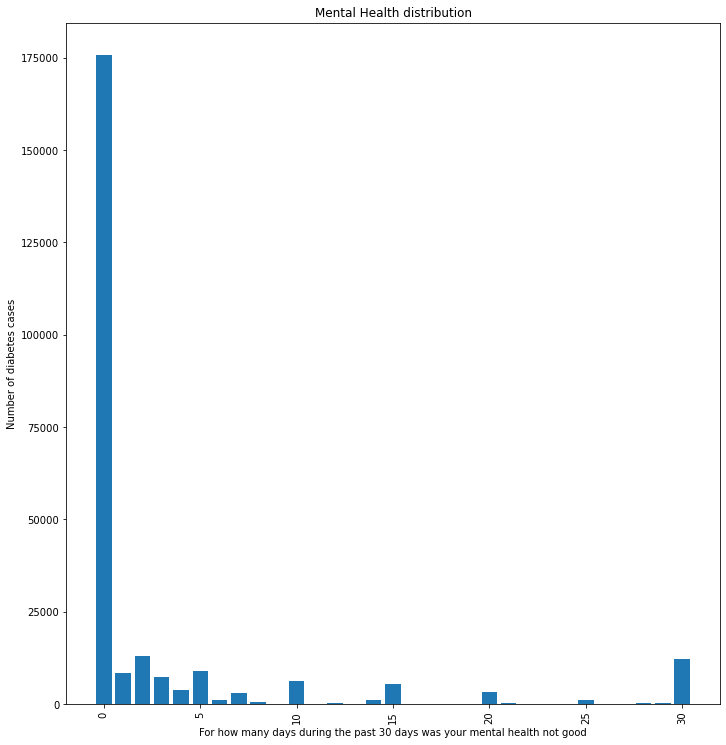

In [96]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['MentHlth'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Mental Health distribution")
plt.xlabel("For how many days during the past 30 days was your mental health not good")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Physical Health distribution

In [97]:
df_grouped = df_pd.groupby('PhysHlth')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,PhysHlth,Diabetes_012
0,0,160052
30,30,19400
2,2,14764
1,1,11388
3,3,8495
5,5,7622
10,10,5595
15,15,4916
4,4,4542
7,7,4538


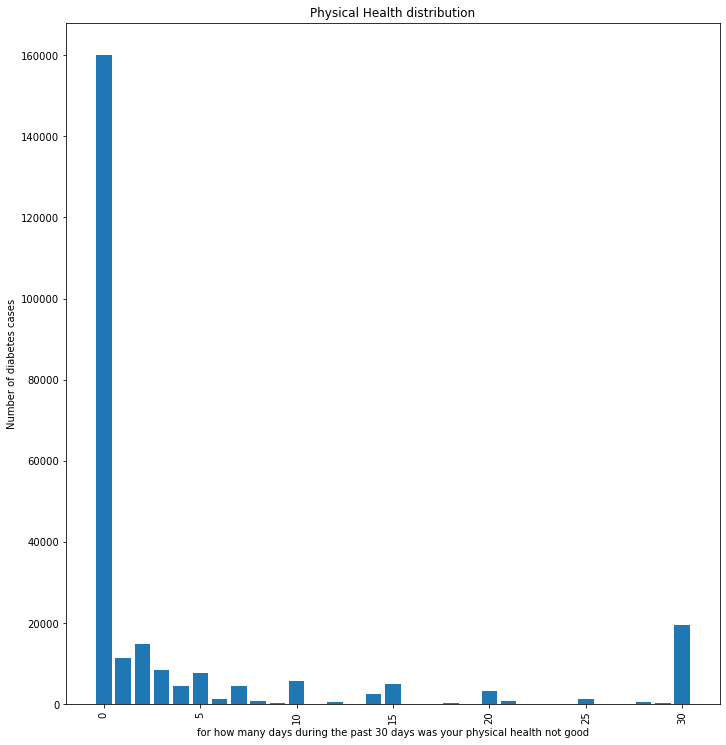

In [98]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['PhysHlth'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Physical Health distribution")
plt.xlabel("for how many days during the past 30 days was your physical health not good")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Difficulty Walking distribution

In [99]:
df_grouped = df_pd.groupby('DiffWalk')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,DiffWalk,Diabetes_012
0,0,211005
1,1,42675


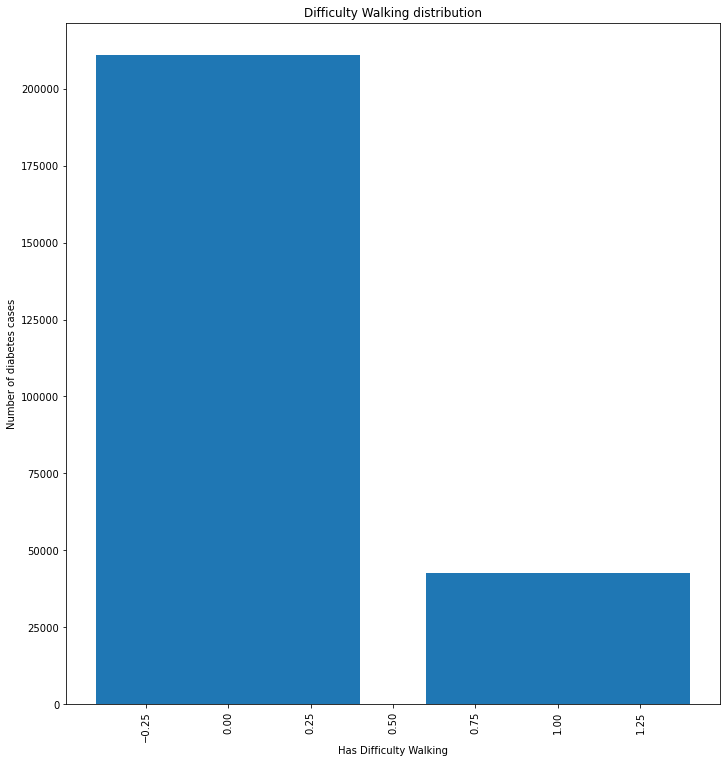

In [100]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['DiffWalk'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Difficulty Walking distribution")
plt.xlabel("Has Difficulty Walking")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Sex distribution

In [101]:
df_grouped = df_pd.groupby('Sex')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Sex,Diabetes_012
0,0,141974
1,1,111706


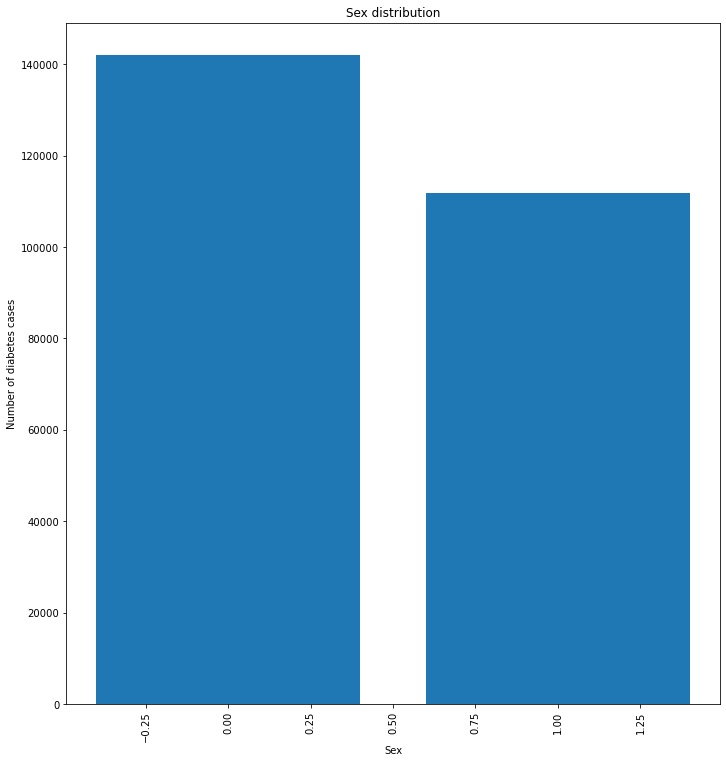

In [102]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Sex'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Sex distribution")
plt.xlabel("Sex")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Age distribution

In [103]:
df_grouped = df_pd.groupby('Age')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Age,Diabetes_012
8,9,33244
9,10,32194
7,8,30832
6,7,26314
10,11,23533
5,6,19819
12,13,17363
4,5,16157
11,12,15980
3,4,13823


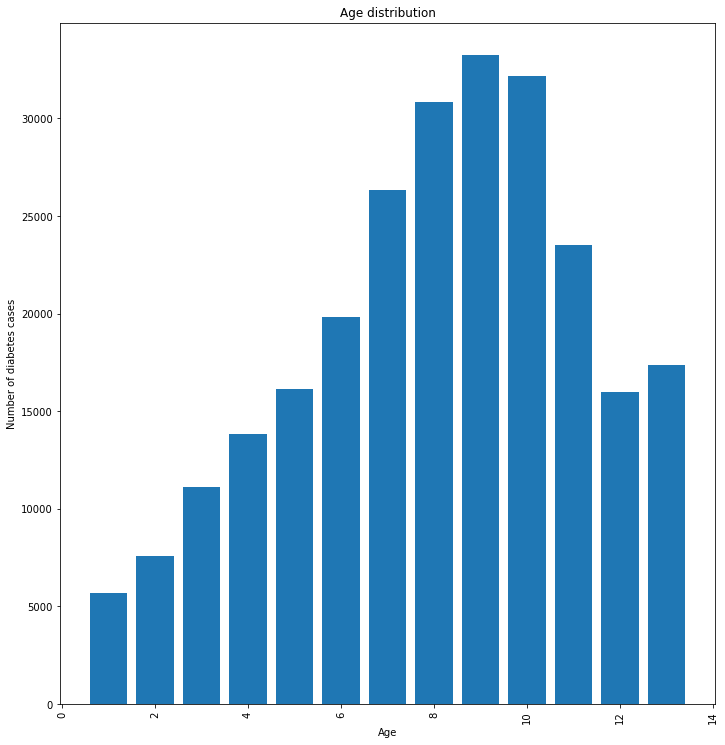

In [104]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Age'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Age distribution")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Education distribution

In [105]:
df_grouped = df_pd.groupby('Education')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Education,Diabetes_012
5,6,107325
4,5,69910
3,4,62750
2,3,9478
1,2,4043
0,1,174


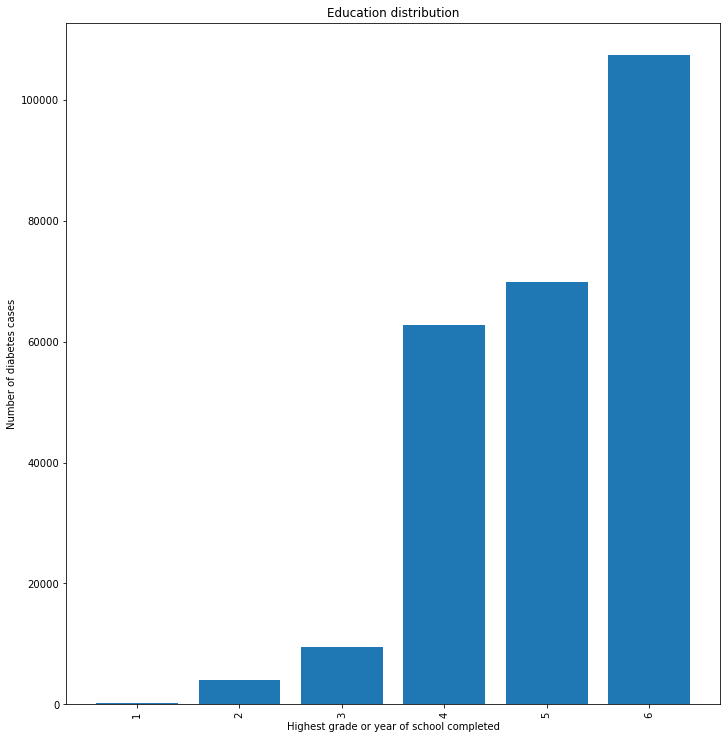

In [106]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Education'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Education distribution")
plt.xlabel("Highest grade or year of school completed")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()

## Income distribution

In [107]:
df_grouped = df_pd.groupby('Income')['Diabetes_012'].count().reset_index()\
 .sort_values('Diabetes_012', ascending=False)
df_grouped

,Income,Diabetes_012
7,8,90385
6,7,43219
5,6,36470
4,5,25883
3,4,20135
2,3,15994
1,2,11783
0,1,9811


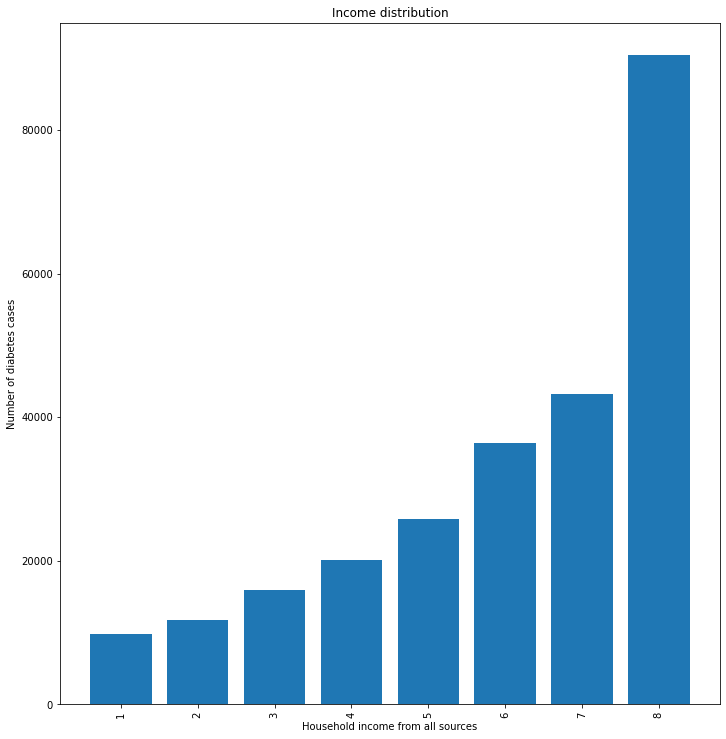

In [108]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_grouped['Income'], df_grouped['Diabetes_012'])
plt.tight_layout()
plt.title("Income distribution")
plt.xlabel("Household income from all sources")
plt.xticks(rotation=90)
plt.ylabel("Number of diabetes cases")
plt.show()